In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import mean_absolute_error,silhouette_score

In [2]:
db = pd.read_csv(r"C:\Users\admin\Downloads\DB_dataset.csv")

In [3]:
db.head()

,Weight,Height
0,67.062924,176.086355
1,68.804094,178.388668
2,60.930863,170.284496
3,59.733843,168.691992
4,65.431230,173.763679


In [4]:
db.describe()

,Weight,Height
count,500.000000,500.000000
mean,61.270240,169.515781
std,5.196976,4.805095
min,50.433644,160.182164
25%,57.772791,166.607599
50%,61.961518,169.726252
75%,65.439332,172.837284
max,70.700456,178.894770


In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
std = StandardScaler()


In [8]:
db_new = pd.DataFrame(std.fit_transform(db),columns=db.columns)

In [9]:
db_new

,Weight,Height
0,1.115742,1.368788
1,1.451113,1.848408
2,-0.065368,0.160139
3,-0.295929,-0.171612
4,0.801458,0.884926
...,...,...
495,-0.249097,0.034156
496,0.992642,1.064476
497,-1.476478,-1.582524
498,-2.087262,-1.816746


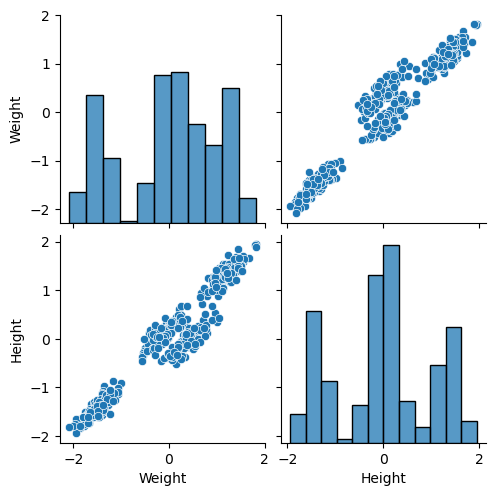

In [10]:
sns.pairplot(db_new)

In [11]:
from sklearn.cluster import DBSCAN

In [18]:
min_samples = range(1,10)
eps = np.arange(0.1,0.9)

In [19]:
output = []
for m in min_samples:
    for ep in eps:
        labels = DBSCAN(eps=ep,min_samples=m).fit(db_new).labels_
        score = silhouette_score(db_new,labels)
        output.append((m,eps,score))

In [21]:
output

[(1, array([0.1]), -0.04299681057231643),
 (2, array([0.1]), 0.2832200472847609),
 (3, array([0.1]), 0.42737747491884875),
 (4, array([0.1]), 0.5359027025302264),
 (5, array([0.1]), 0.4827750201294571),
 (6, array([0.1]), 0.4076103765285375),
 (7, array([0.1]), 0.4749535686603094),
 (8, array([0.1]), 0.36094434711787066),
 (9, array([0.1]), 0.3333993335941656)]

In [16]:
DBSCAN()

DBSCAN()

In [22]:
np.max(output)

c:\Users\admin\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


9

In [24]:
a=pd.DataFrame(output)

In [25]:
plt.hist(a,bins=50)

(array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
         0., 1.],
        [9., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0.],
        [1., 1., 6., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0.]]),
 array([-0.04299681057231643, 0.13786312563912995, 0.3187230618505763,
        0.49958299806202267, 0.680442934273469, 0.8613028704849154,
        1.0421628066963617, 1.223022742907808, 1.4038826791192545,
        1.584742615330701, 1.7656025515421472, 1.9464624877535934,
        2.1273

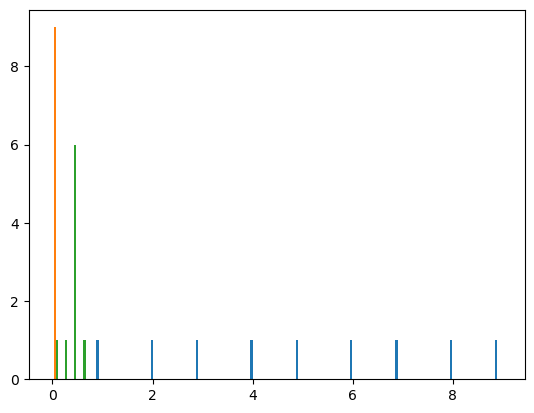

In [26]:
plt.show()